# How much does risk pay?
***—Return of a geometric brownian motion with no drift***


## Abstract

The collosal effect of exponensial growth is well known. A less known fact is that volatility, under exponetial growth regimes, itself can be rewarding. Even a geometric geometric brownian with zero drift will on average grow, because the upside's upside is bigger than the downside's downside. The question is: how big is this effect?

Here I have modeled and calculated the return of geometric brownian motions wihout drift. The calculations show that with a volatility/standard divitions of ±20% per time unit the average return is ca. 2% per time unit (22% from 10 time units). With ±50% it is 14% (300%). 

S&P500, that has had a volatility of 19.7% from 1928–2015, 2.0% of its 11.4% average return has come from volatility.


## Introduction


Most random exponential growth processes can be modeled (at least partially) as a geometric brownian motion. That includes examples like the growth of a stock, customer growth or growth of personal wealth. 

Let us first define a geometric brownian motion $GB_t = exp(\mu t + \sigma B_t)$ where $B_t$ is a brownian motion,  $\mu$ is the expected instantaneous growth rate per unit of time (drift) and $\sigma$ is the instantaneous standard divition per unit of time.

According to Wikipedia $GB_t$'s mean and variance should be:

$$ E[GB_t] = exp(\mu t + \frac{1}{2}\sigma^2) $$

$$ VAR[GB_t] = [\exp(\sigma^2)-1]\exp(2\mu +\sigma^2) $$ 

Median (og geometrisk gjennomsnitt) = $exp(\mu)$

Dette er sant under eksponensiell vekst siden oppsidens oppside er større enn nedsidens nedside.

Så hvor stor er denne effekten?

 and (2) under exponential growth. While the median return is zero, the average is positive. The reason is that the upside's upside is bigger than the downside's downside. 

In [2]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## 10 brownian motions with no drift and st.d. = 50% 

De fleste aksjene/prosjektene holder seg omtrent rundt null og median = 0. Likevel bringer prosjektene ganske mye avkastning renters renter eller oppsidens oppside kan bli ganske stor i snitt er ganske positiv.

0.9135475625741247
0.9256164401400766

1.1254855008663505
1.0051084023273487


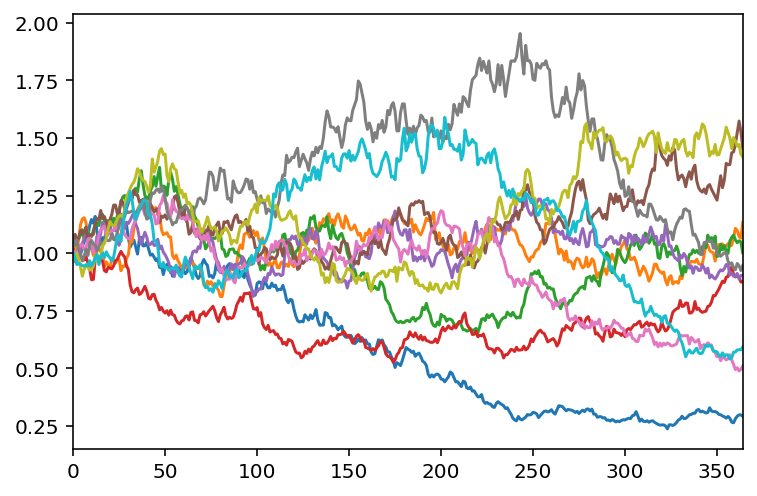

In [16]:
mean = 0     # Intatanious drift per yar
sigma = 0.50 # Intatanious volatility per yar
dt = 1.0/365
t_end = 1


dW_t = lambda mean, sigma, dt, t_end: norm.rvs(loc = mean*dt, scale=sigma*np.sqrt(dt), size=int(t_end/dt))
paths = [pd.Series(np.exp(np.cumsum(dW_t(mean, sigma, dt, t_end)))) for _ in range(10000)]
ends = [path.iloc[-1] for path in paths]
for path in paths[:10]:
    path.plot()

print(np.mean(ends[:10])) # Forventet = 1.1331 (13%)
print(np.median(ends[:10])) # Forventet = 1 (0%)
print()
print(np.mean(ends)) # Forventet = 1.1331 (13%)
print(np.median(ends)) # Forventet = 1 (0%)

Text(0, 0.5, 'Return per year')

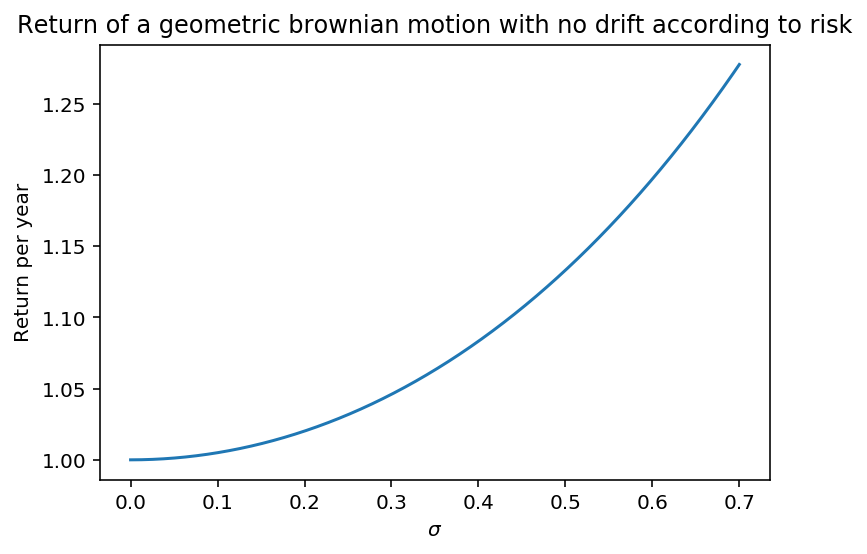

In [15]:
sigmas = np.linspace(0, 0.7, 1000)
#std_lognormal = np.sqrt((np.exp(sigmas**2)-1)*np.exp(2*mu + sigmas**2))
mean_return = np.exp(0.5*sigmas**2)

plt.plot(sigmas, mean_return)
#plt.plot(std_lognormal[:800], mean_return[:800], "--")
plt.title("Return of a geometric brownian motion with no drift according to risk")
plt.xlabel("$\sigma$")
#plt.xlabel("Sigma/St.d deviation")
plt.ylabel("Return per year")
#plt.legend(["Sigma", "St.d deviation"])

Text(0, 0.5, 'Return per year')

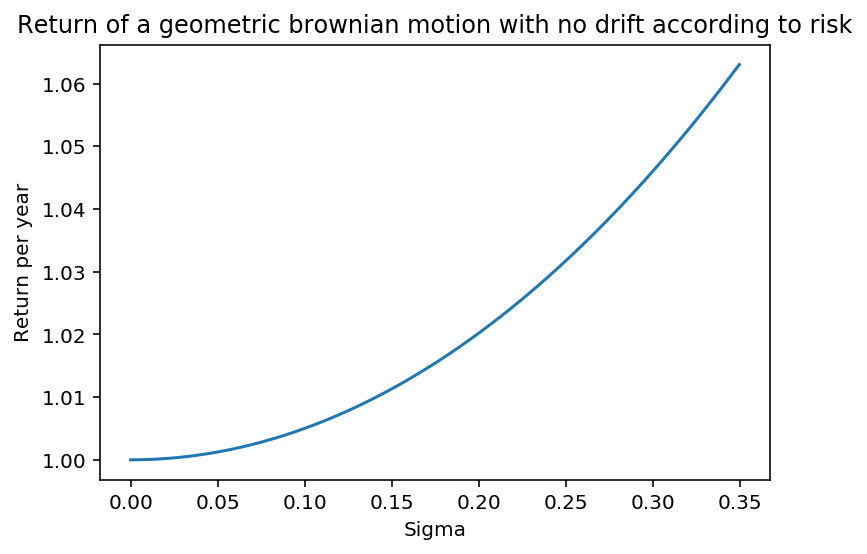

In [145]:
plt.plot(sigmas[0:500], mean_return[0:500])
plt.title("Return of a geometric brownian motion with no drift according to risk")
plt.xlabel("Sigma")
plt.ylabel("Return per year")

Text(0, 0.5, 'Return per year')

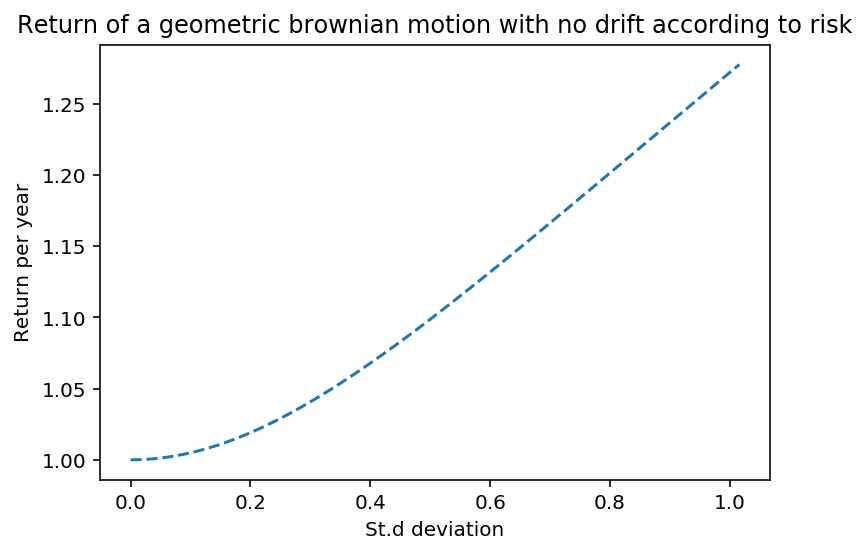

In [138]:
sigmas = np.linspace(0, 0.7, 1000)
std_lognormal = np.sqrt((np.exp(sigmas**2)-1)*np.exp(2*mu + sigmas**2))
mean_return = np.exp(0.5*sigmas**2)

#plt.plot(sigmas, mean_return)
plt.plot(std_lognormal, mean_return, "--")
plt.title("Return of a geometric brownian motion with no drift according to risk")
plt.xlabel("St.d deviation")
plt.ylabel("Return per year")

## S&P500
Standard devation of S&P500 from 1928–2015: 19.7%

In [35]:
sigma = 0.197
r = np.exp(0.5*sigma**2)
r_percent = (r - 1) * 100
print("Return S&P500 from volaitility: %.02f%%" % r_percent)

Return S&P500 from volaitility: 1.96%


## Like stor return hvis du har en samling brownian motions?
Burde være like stor
... og det ser det også ut til å være

Text(0, 0.5, 'Return per year')

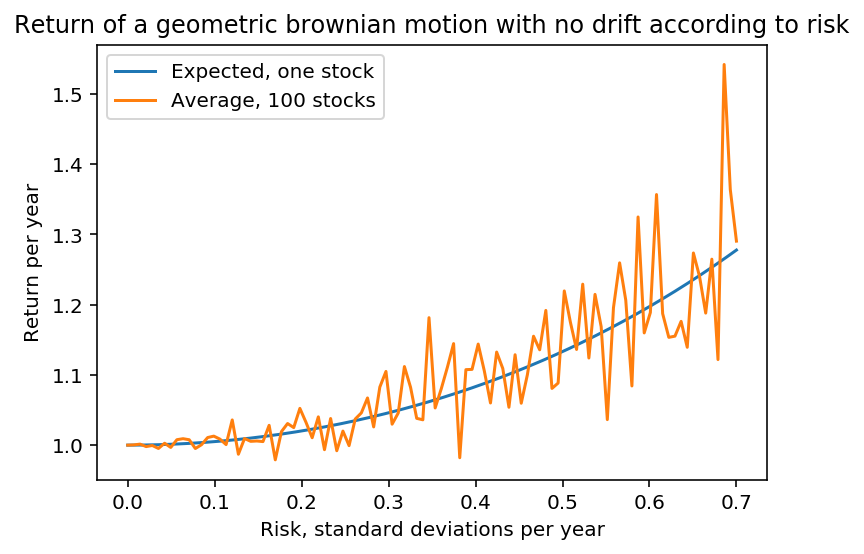

In [24]:
def l(mean, sigma, stocks = 100):
    n = stocks
    dt = 1.0/365
    t_end = 1
    ends = [np.exp(np.cumsum(dW_t(mean, sigma, dt, t_end)))[-1] for _ in range(n)]
    average = sum(ends) / len(ends)
    return average

sigmas2 = np.linspace(0, 0.7, 100)
mean_returns = [l(0, sigma, stocks = 100) for sigma in sigmas2]
plt.plot(sigmas, mean_return)
plt.plot(sigmas2, mean_returns)
plt.title("Return of a geometric brownian motion with no drift according to risk")
plt.xlabel("Risk, standard deviations per year")
plt.ylabel("Return per year")
plt.legend(["Expected, one stock", "Average, 100 stocks"])

In [97]:
print("Mean and st.d. from S&P500 1928–2015 (which we assume is a lognormal distribution)")
m, s = 1.114122, 0.197028
print("%.04f %.04f" % (m, s))

mu = np.log(m) - 0.5*np.log((s/m)**2 + 1)
sigma = np.sqrt(np.log((s/m)**2 + 1))
print()
print("What is the instantanious return per year mu and instatanious volatility per year sigma?")
print("%.04f %.04f" % (mu, sigma))

print()
print("Check if formulas work:")
#mu = 0.0927
#sigma = 0.1755
mean_lognormal = np.exp(mu+0.5*sigma**2)
std_lognormal = np.sqrt((np.exp(sigma**2)-1)*np.exp(2*mu + sigma**2))
print("%.04f %.04f" % (mu, sigma))
print("%.04f %.04f" % (mean_lognormal, std_lognormal))

Mean and st.d. from S&P500 1928–2015 (which we assume is a lognormal distribution)
1.1141 0.1970

What is the instantanious return per year mu and instatanious volatility per year sigma?
0.0927 0.1755

Check if formulas work:
0.0927 0.1755
1.1141 0.1970


Text(0, 0.5, 'Standard deviation of log.normal')

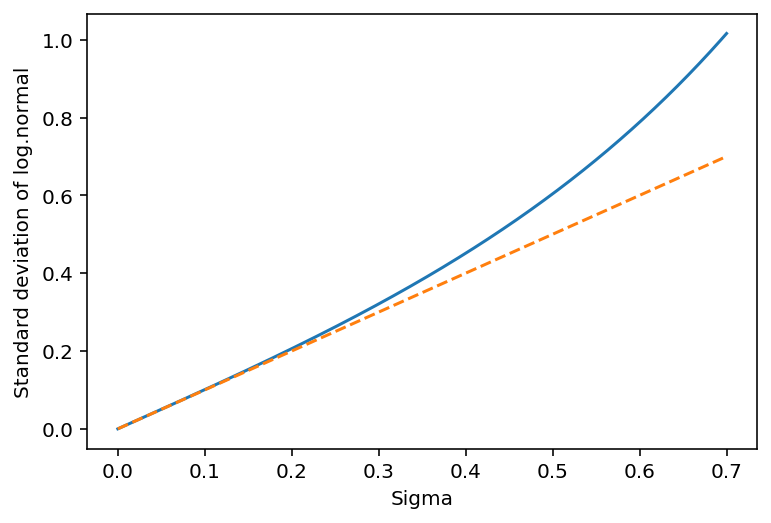

In [128]:
mu = 0
sigmas = np.linspace(0, 0.7, 1000)
std_lognormal = np.sqrt((np.exp(sigmas**2)-1)*np.exp(2*mu + sigmas**2))
plt.plot(sigmas, std_lognormal)
plt.plot(sigmas, sigmas, "--")
plt.title("")
plt.xlabel("Sigma")
plt.ylabel("Standard deviation of log.normal")
#plt.axis('equal')
#plt.axis([0.0, 1.5, 0.0, 1.0])